In [1]:
# Przykładowy skan

!wget https://miro.medium.com/v2/resize:fit:640/format:webp/1*xowxuV_7y-egZuFirMILXg.jpeg

Ostrzeżenie: znaki globalne nie są obsługiwane w HTTP.
--2024-06-10 21:10:01--  https://miro.medium.com/v2/resize:fit:640/format:webp/1*xowxuV_7y-egZuFirMILXg.jpeg
Translacja miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9904, ...
Łączenie się z miro.medium.com (miro.medium.com)|162.159.153.4|:443... połączono.
Żądanie HTTP wysłano, oczekiwanie na odpowiedź... 200 OK
Długość: 71314 (70K) [image/webp]
Zapis do: ‘1*xowxuV_7y-egZuFirMILXg.jpeg’

1*xowxuV_7y-egZuFir 100%[===================>]  69,64K  --.-KB/s    w 0,003s   

2024-06-10 21:10:01 (21,8 MB/s) - zapisano ‘1*xowxuV_7y-egZuFirMILXg.jpeg’ [71314/71314]



In [3]:
!mv '1*xowxuV_7y-egZuFirMILXg.jpeg' scan.jpg

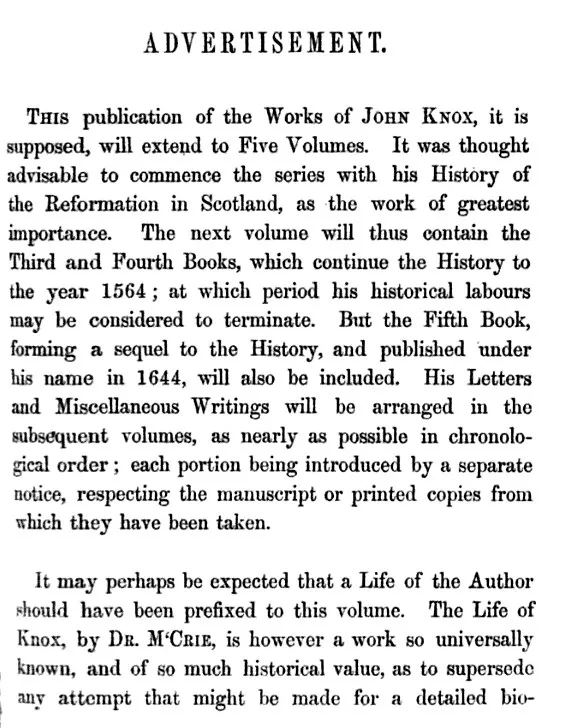

In [21]:
from IPython.display import Image
Image(filename='scan.jpg')

In [4]:
from prepline_paddleocr.api.paddleocr import pipeline_api

filename = "./scan.jpg"

with open(filename, "rb") as f:
    scan = pipeline_api(file=f)

In [9]:
print(type(scan))

<class 'str'>


In [15]:
import json
from pprint import pprint

json_string = scan
dict_from_json = json.loads(json_string)
print(dict_from_json)

{'result': [[[[146.0, 32.0], [385.0, 32.0], [385.0, 51.0], [146.0, 51.0]], ['ADVERTISEMENT', 0.9969]], [[[27.0, 106.0], [528.0, 105.0], [528.0, 126.0], [27.0, 127.0]], ['THIS publication of the Works of JoHN KNoX, it is', 0.9012]], [[[7.0, 135.0], [530.0, 134.0], [530.0, 157.0], [7.0, 158.0]], ['supposed, will extend to Five Volumes. It was thought', 0.9579]], [[[7.0, 164.0], [532.0, 165.0], [532.0, 185.0], [7.0, 184.0]], ['advisable to commence the series with his History of', 0.9433]], [[[8.0, 193.0], [530.0, 194.0], [530.0, 214.0], [8.0, 213.0]], ['the Reformation in Scotland, as the work of greatest', 0.957]], [[[6.0, 222.0], [532.0, 220.0], [532.0, 243.0], [6.0, 245.0]], ['importance. The next volume will thus contain the', 0.9768]], [[[8.0, 250.0], [530.0, 253.0], [530.0, 274.0], [8.0, 271.0]], ['Third and Fourth Books, which continue the History to', 0.9453]], [[[11.0, 282.0], [531.0, 282.0], [531.0, 302.0], [11.0, 302.0]], ['the year 1564; at which period his historical labours

In [19]:
text_lines = [entry[1][0] for entry in dict_from_json['result']]

text = '\n'.join(text_lines)


with open('./extracted_text.txt', 'w') as file:
    file.write(text)

pprint(text.replace("\n", ""))   # tekst po OCR

('ADVERTISEMENTTHIS publication of the Works of JoHN KNoX, it issupposed, will '
 'extend to Five Volumes. It was thoughtadvisable to commence the series with '
 'his History ofthe Reformation in Scotland, as the work of '
 'greatestimportance. The next volume will thus contain theThird and Fourth '
 'Books, which continue the History tothe year 1564; at which period his '
 'historical laboursmay be considered to terminate. But the Fifth Book,forming '
 'a sequel to the History, and published underhis name in 1644, will also be '
 'included. His Lettersand Miscellaneous Writings will be arranged in '
 'thesubsequent volumes, as nearly as possible in chronolo-gical order; each '
 'portion being introduced by a separatenotice, respecting the manuscript or '
 'printed copies fromwhich they have been taken.It may perhaps be expected '
 'that a Life of the Authorshould have been prefixed to this volume. The Life '
 'ofKnox, by DR.M CRIE,is however a work so universallyknown, and of so much 